In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('code/preprocessing/')
from squad_preprocess import get_char_word_loc_mapping

In [2]:
dataFile = "./data/train-v1.1.json"
with open(dataFile) as file:
    trainingData = json.load(file)

(array([1.253e+03, 2.753e+03, 6.732e+03, 4.147e+03, 2.051e+03, 1.013e+03,
        5.280e+02, 2.050e+02, 1.120e+02, 5.600e+01, 1.800e+01, 1.200e+01,
        7.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 20.  ,  51.65,  83.3 , 114.95, 146.6 , 178.25, 209.9 , 241.55,
        273.2 , 304.85, 336.5 , 368.15, 399.8 , 431.45, 463.1 , 494.75,
        526.4 , 558.05, 589.7 , 621.35, 653.  ]),
 <a list of 20 Patch objects>)

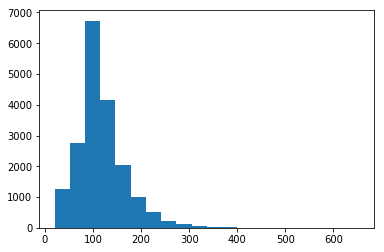

In [3]:
# Plot the context lengths as a histogram
cntContextLen = []
for topic in trainingData['data']:
    for paragraph in topic['paragraphs']:
        context = paragraph['context'].split()
        cntContextLen.append(len(context))
plt.hist(cntContextLen, bins=20)

(array([2.6713e+04, 2.1363e+04, 1.6403e+04, 1.1616e+04, 5.7720e+03,
       2.9670e+03, 1.4520e+03, 6.6800e+02, 3.3000e+02, 1.4000e+02,
       7.7000e+01, 5.3000e+01, 1.7000e+01, 9.0000e+00, 8.0000e+00,
       2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00]), array([  1. ,  25.8,  50.6,  75.4, 100.2, 125. , 149.8, 174.6, 199.4,
       224.2, 249. , 273.8, 298.6, 323.4, 348.2, 373. , 397.8, 422.6,
       447.4, 472.2, 497. ]), <a list of 20 Patch objects>)
87599


'Saint Bernadette Soubirous'

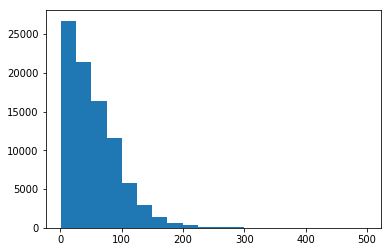

In [13]:
# Plot the end points of the answer as a histogram
ansEndPt = []
totQApairs = 0
for topic in trainingData['data']:
    for paragraph in topic['paragraphs']:
        context = paragraph['context']
        char2tokenId = get_char_word_loc_mapping(context, context.split())
        for qaPair in paragraph['qas']:
            for ans in qaPair['answers']:        
                try :
                    tokenNum = char2tokenId[ans['answer_start']][1] + len(ans['text'].split())
                except :
                    pass
                ansEndPt.append(tokenNum)
a = plt.hist(ansEndPt, bins=20)
print(a)
trainingData['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text']

There are 87600 questions in the dataset, 11(0.01%) end beyond the 380th word and 45(0.05%) end beyond the 300th word. Since the largest context length is 653, this suggests that the first part of the context is more likely to contain the answer and the entire context may not be needed!

(array([1.8300e+03, 3.0472e+04, 3.6485e+04, 1.4287e+04, 3.5870e+03,
       7.2900e+02, 1.5700e+02, 4.0000e+01, 1.0000e+01, 2.0000e+00]), array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]), <a list of 10 Patch objects>)
total number of questions : 87599


'Saint Bernadette Soubirous'

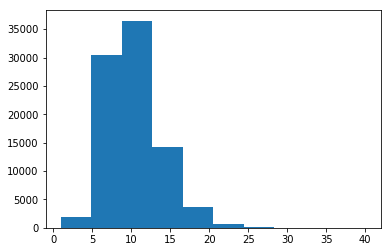

In [21]:
# Plot the lengths of the questions as a histogram
quesLens = []
totQApairs = 0
for topic in trainingData['data']:
    for paragraph in topic['paragraphs']:       
        for qaPair in paragraph['qas']:
            totQApairs += 1
            qSize = len(qaPair['question'].split())
            quesLens.append(qSize)
a = plt.hist(quesLens, bins=10)
print(a)
print("total number of questions : {}".format(totQApairs))
trainingData['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text']

Appendix E : Roughwork

In [5]:
type(trainingData['data'][0])

dict

In [6]:
trainingData['data'][0]['title']

'University_of_Notre_Dame'

In [7]:
type(trainingData['data'][0]['paragraphs'])

list

In [8]:
trainingData['data'][0]['paragraphs'][0]

{'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'qas': [{'answers': [{'answer_start': 515,
     'text': 'Saint Bernadette Soubirous'}],
   'id': '5733be284776f41900661182',
   'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'},
  {'answers': [{'answer_start': 188, 'text': 'a copper statue of Christ

In [9]:
trainingData['data'][0]['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}],
 'id': '5733be284776f41900661182',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'}

In [10]:
trainingData['data'][0]['paragraphs'][0]['qas'][0]['question']
'answer_start: {}'.format(trainingData['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['answer_start'])
trainingData['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text']

'Saint Bernadette Soubirous'

In [11]:
context = trainingData['data'][0]['paragraphs'][0]['context']
context[515:541]

'Saint Bernadette Soubirous'